In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

D:\ANACONDA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"D:\JAIMIN\Data Science\Machine Learning\mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.shape

(8124, 23)

In [5]:
df.size

186852

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
df.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [12]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [13]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

Text(0, 0.5, 'Count')

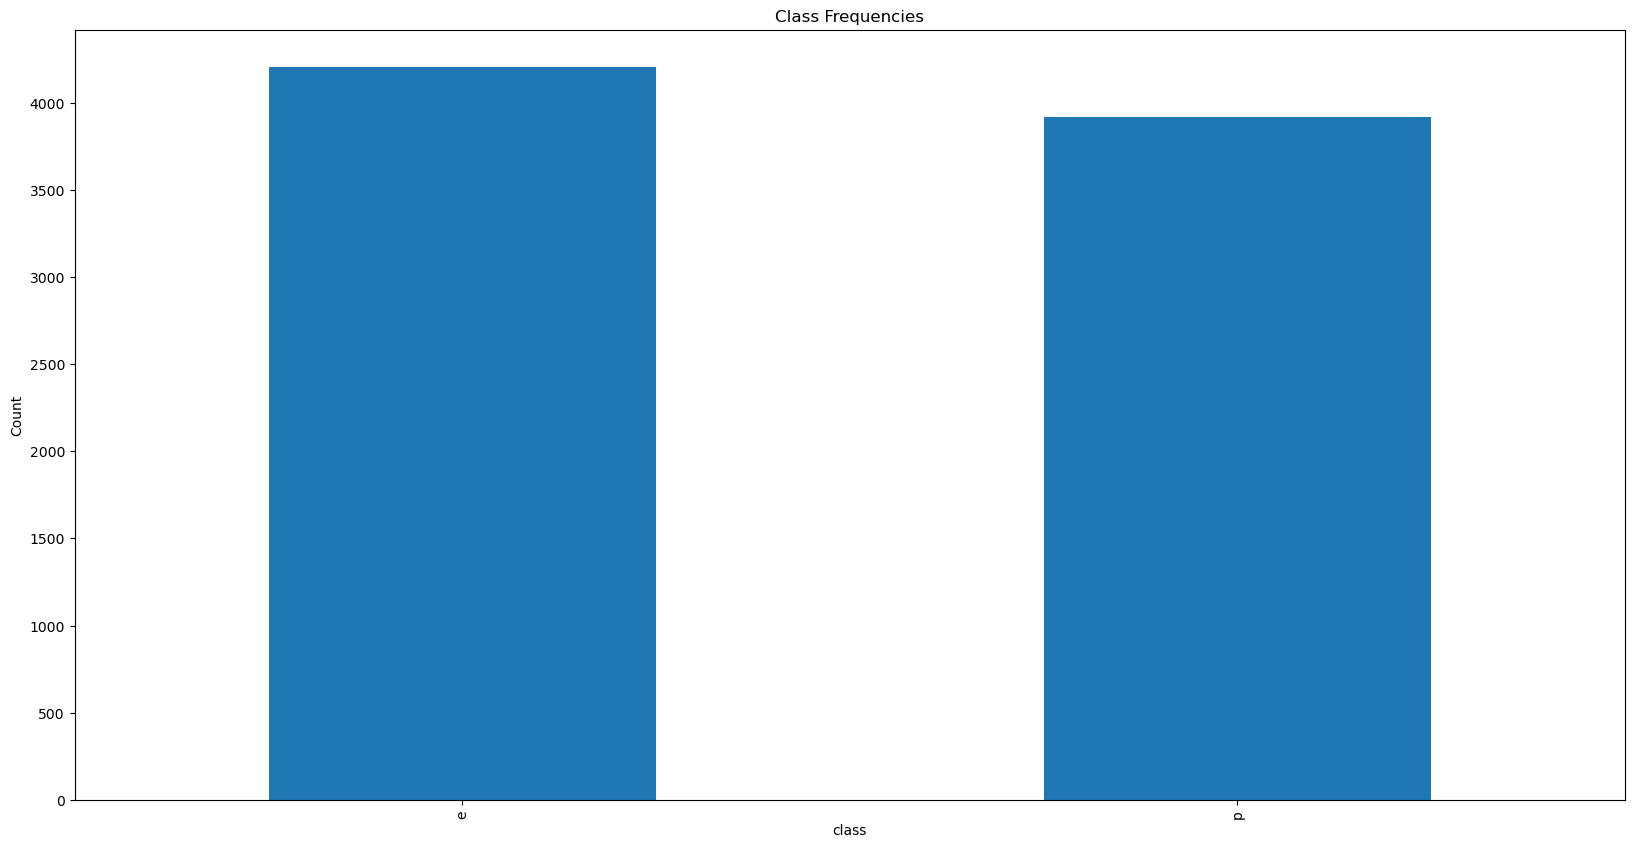

In [14]:
plt.figure(figsize=(20,10))
df['class'].value_counts().plot(kind ="bar")
plt.title('Class Frequencies')
plt.xlabel('class')
plt.ylabel('Count')

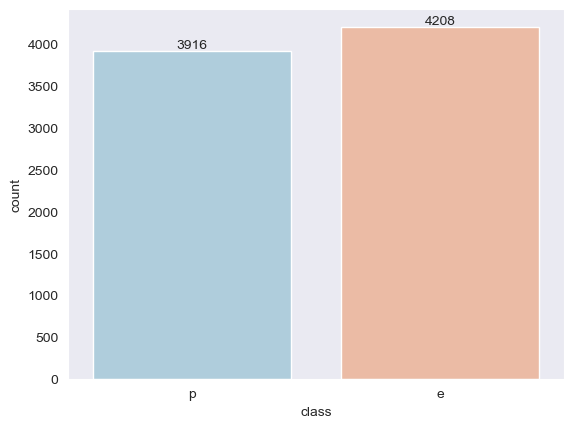

In [15]:
sns.set_style('dark')
ax = sns.countplot(x = 'class', data=df, palette = 'RdBu_r')
for bars in ax.containers: 
    ax.bar_label(bars)

In [16]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [17]:
feature_uni = df.describe().transpose().reset_index().sort_values('unique')

<Axes: xlabel='unique', ylabel='index'>

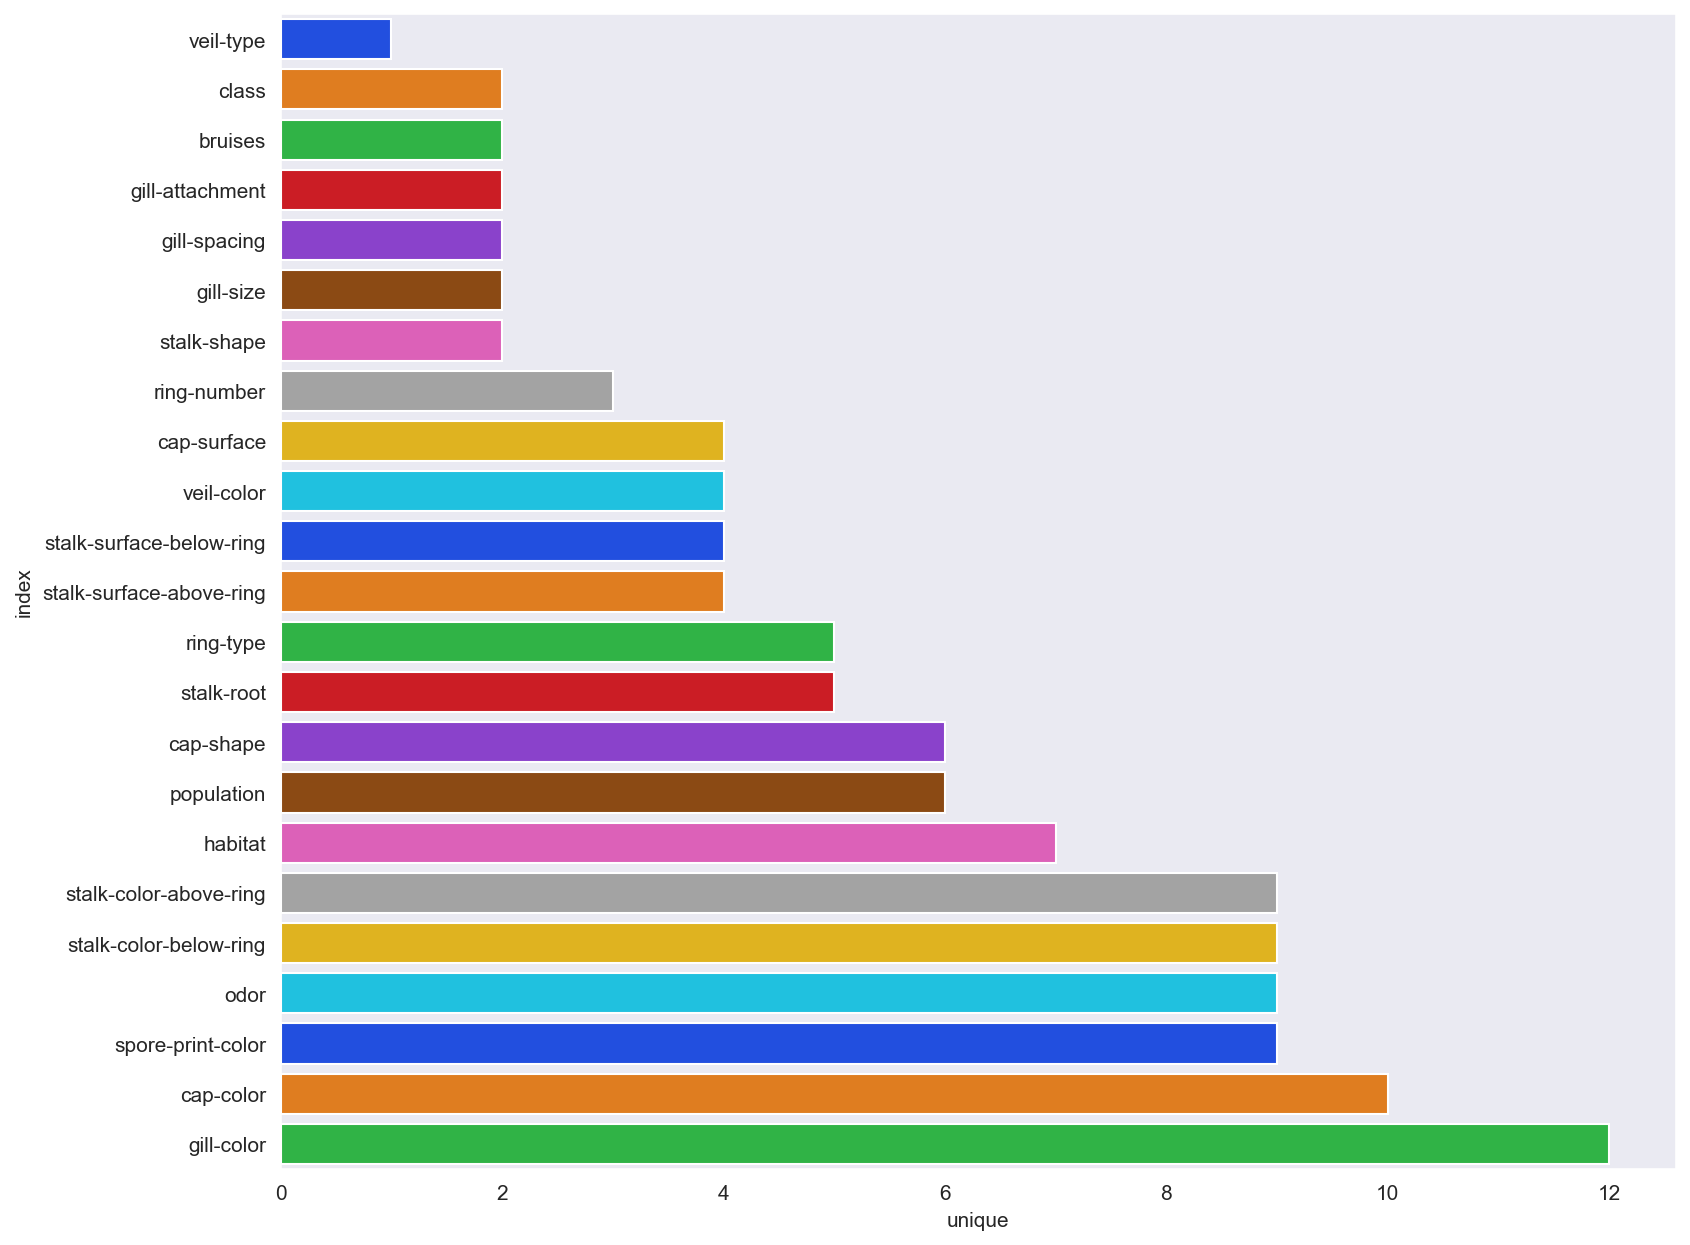

In [18]:
plt.figure(figsize=(12,10), dpi = 150) # dpi is pixel depth
sns.barplot(data=feature_uni, x = 'unique', y = 'index', palette = 'bright')

In [19]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
x = df.drop('class', axis = 1)
print(x)
y = df['class']
print(y)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [22]:
for label in df.columns:
    df[label] = LabelEncoder().fit(df[label]).transform(df[label])

In [23]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [24]:
# Now split your data and train the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model = AdaBoostClassifier(n_estimators = 1) # n_estimators = 1 means only one decision tree

In [27]:
model.fit(x_train, y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [29]:
preds = model.predict(x_test)
preds

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



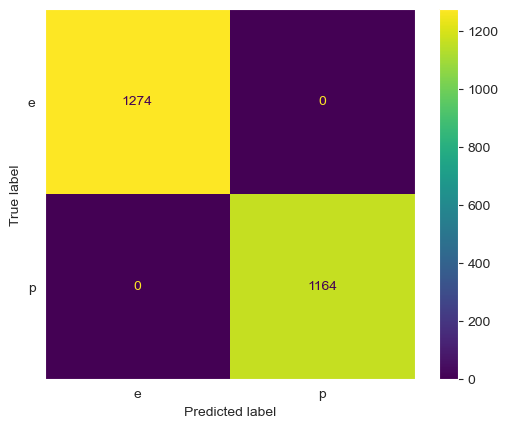

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Assuming you have already split your data into x_train, x_test, y_train, y_test
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [32]:
# Assuming you have already split your data into x_train, x_test, y_train, y_test
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

In [33]:
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 1.0


In [34]:
model.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [35]:
model.feature_importances_.argmax()

0

In [36]:
x.columns[4]

'odor'

<Axes: xlabel='odor', ylabel='count'>

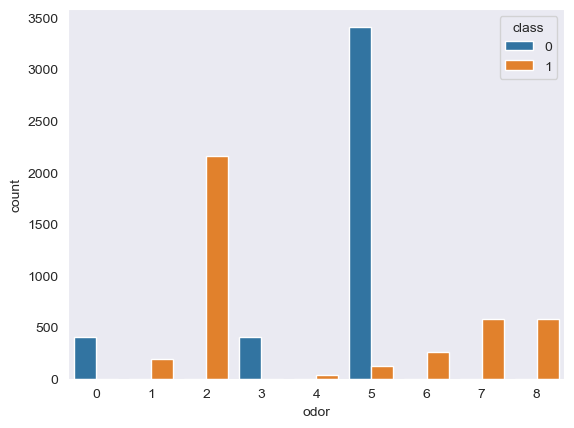

In [37]:
sns.countplot(data = df, x = 'odor', hue = 'class')

In [38]:
len(x.columns)

22

In [39]:
error_rates = []

for n in range(1,23):
    model = AdaBoostClassifier(n_estimators = n)
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\ANACONDA\anaconda3\Li

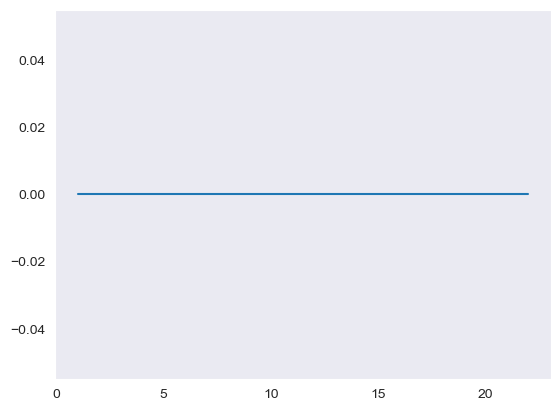

In [40]:
plt.plot(range(1,23), error_rates)

In [41]:
model

AdaBoostClassifier(n_estimators=22)

In [42]:
model.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [43]:
# Example: Removing the extra feature importance value
feats = pd.DataFrame(index=x.columns, data=model.feature_importances_[:len(x.columns)], columns=['Importance'])
feats

,Importance
cap-shape,1.0
cap-surface,0.0
cap-color,0.0
bruises,0.0
odor,0.0
gill-attachment,0.0
gill-spacing,0.0
gill-size,0.0
gill-color,0.0
stalk-shape,0.0


In [44]:
imp_feats = feats[feats['Importance']>0]
imp_feats

,Importance
cap-shape,1.0


D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


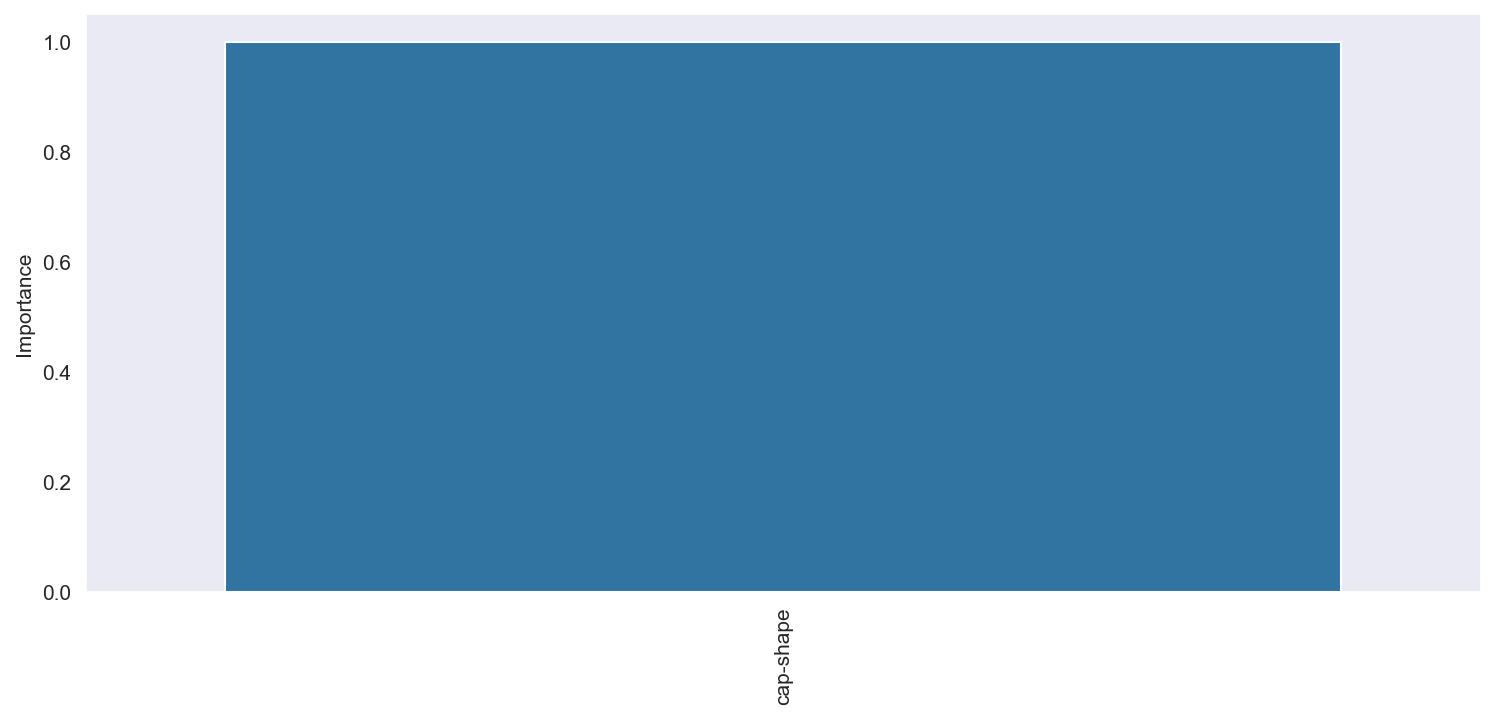

In [45]:
plt.figure(figsize = (12,5), dpi = 150)
sns.barplot(data = imp_feats.sort_values('Importance'), x = imp_feats.index, y = 'Importance')
plt.xticks(rotation = 90);